# Importing all the necessary libraries


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import pandas as pd

2025-01-20 18:42:15.681951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 18:42:15.683266: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 18:42:15.689525: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 18:42:15.708699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737391335.740089  250368 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737391335.74

# Loading Training Dataset and Validation Dataset

## loading training dataset

In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='train_dataset',
    labels='inferred',
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


2025-01-20 18:42:23.829155: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## loading validation dataset

In [3]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='val_dataset',
    labels='inferred',
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


# Building the CNN model

## Definining the CNN model

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.4),
    Dense(units=38, activation='softmax')
])

## Compiling the CNN model

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,289,414 (12.55 MB)

 Trainable params: 3,289,414 (12.55 MB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN model

In [12]:
training_history = model.fit(train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1910s 870ms/step - accuracy: 0.3903 - loss: 2.1840 - val_accuracy: 0.8172 - val_loss: 0.6016
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1874s 853ms/step - accuracy: 0.7972 - loss: 0.6582 - val_accuracy: 0.8946 - val_loss: 0.3374
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1869s 851ms/step - accuracy: 0.8777 - loss: 0.3851 - val_accuracy: 0.9125 - val_loss: 0.2752
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1869s 851ms/step - accuracy: 0.9138 - loss: 0.2680 - val_accuracy: 0.9311 - val_loss: 0.2214
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1869s 851ms/step - accuracy: 0.9356 - loss: 0.1951 - val_accuracy: 0.9418 - val_loss: 0.1842
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1863s 848ms/step - accuracy: 0.9500 - loss: 0.1550 - val_accuracy: 0.9435 - val_loss: 0.1837
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1864s 848ms/step - accuracy: 0.9591 - loss: 0.1222 - val_accuracy: 0.9495 - val_loss: 0.1543
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1876s 854ms/s

## saving the trained model

In [ ]:
model.save('trained_crop_disease_identification_model.keras')


## Saving Training history as a JSON file

In [14]:
with open('training_history.json', 'w') as history_file:
    json.dump(training_history.history, history_file)
    

## Plotting Training results from the JSON file

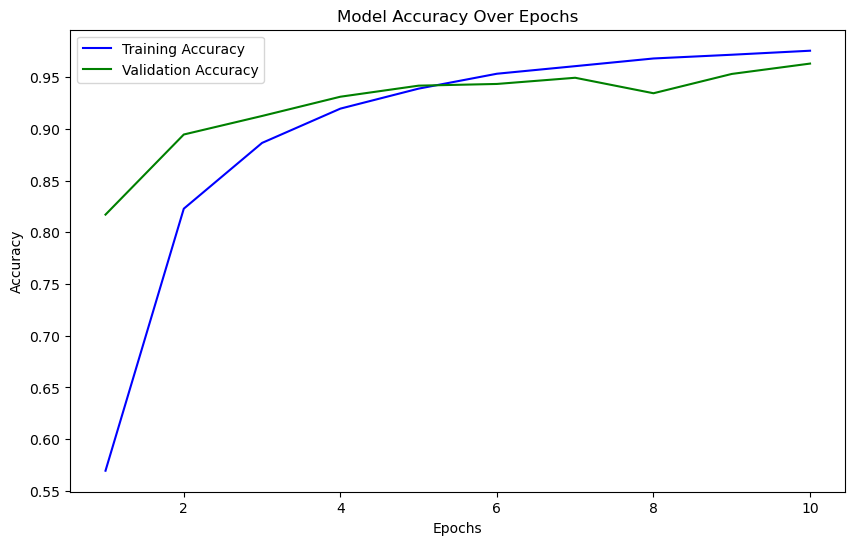

In [15]:
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)


epochs = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()
plt.grid()
plt.savefig(os.path.join(output_dir, 'training_accuracy.jpeg'), format='jpeg')
plt.close()

# Evaluating the trained model's Accuracy

## Model's accuracy on Training dataset

In [16]:
training_loss, training_accuracy = model.evaluate(train_dataset)
print('Training accuracy:', training_accuracy)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 585s 266ms/step - accuracy: 0.9917 - loss: 0.0282
Training accuracy: 0.9930720329284668


## Model's accuracy on Validation dataset

In [17]:
validation_loss, validation_accuracy = model.evaluate(val_dataset)
print('Validation accuracy:', validation_accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 146s 266ms/step - accuracy: 0.9637 - loss: 0.1218
Validation accuracy: 0.9631800651550293


# Evaluating Model's Performance using Performance Metrics

In [22]:
class_labels = val_dataset.class_names
test_dataset = tf.keras.utils.image_dataset_from_directory(
     'val_dataset',
     labels="inferred",
     label_mode="categorical",
     class_names=None,
     color_mode="rgb",
     batch_size=1,
     image_size=(128, 128),
     shuffle=False,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
     follow_links=False,
     crop_to_aspect_ratio=False
)
predictions = model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = tf.concat([y for x, y in test_dataset], axis=0)
true_predictions = tf.argmax(true_classes, axis=1)
Classification_report = classification_report(true_predictions, 
                                              predicted_classes, 
                                              target_names=class_labels)
print(Classification_report)

Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 231s 13ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.97       440
                                   Apple___healthy       0.99      0.91      0.95       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.9

# Evaluating Model's Performance using confusion matrix

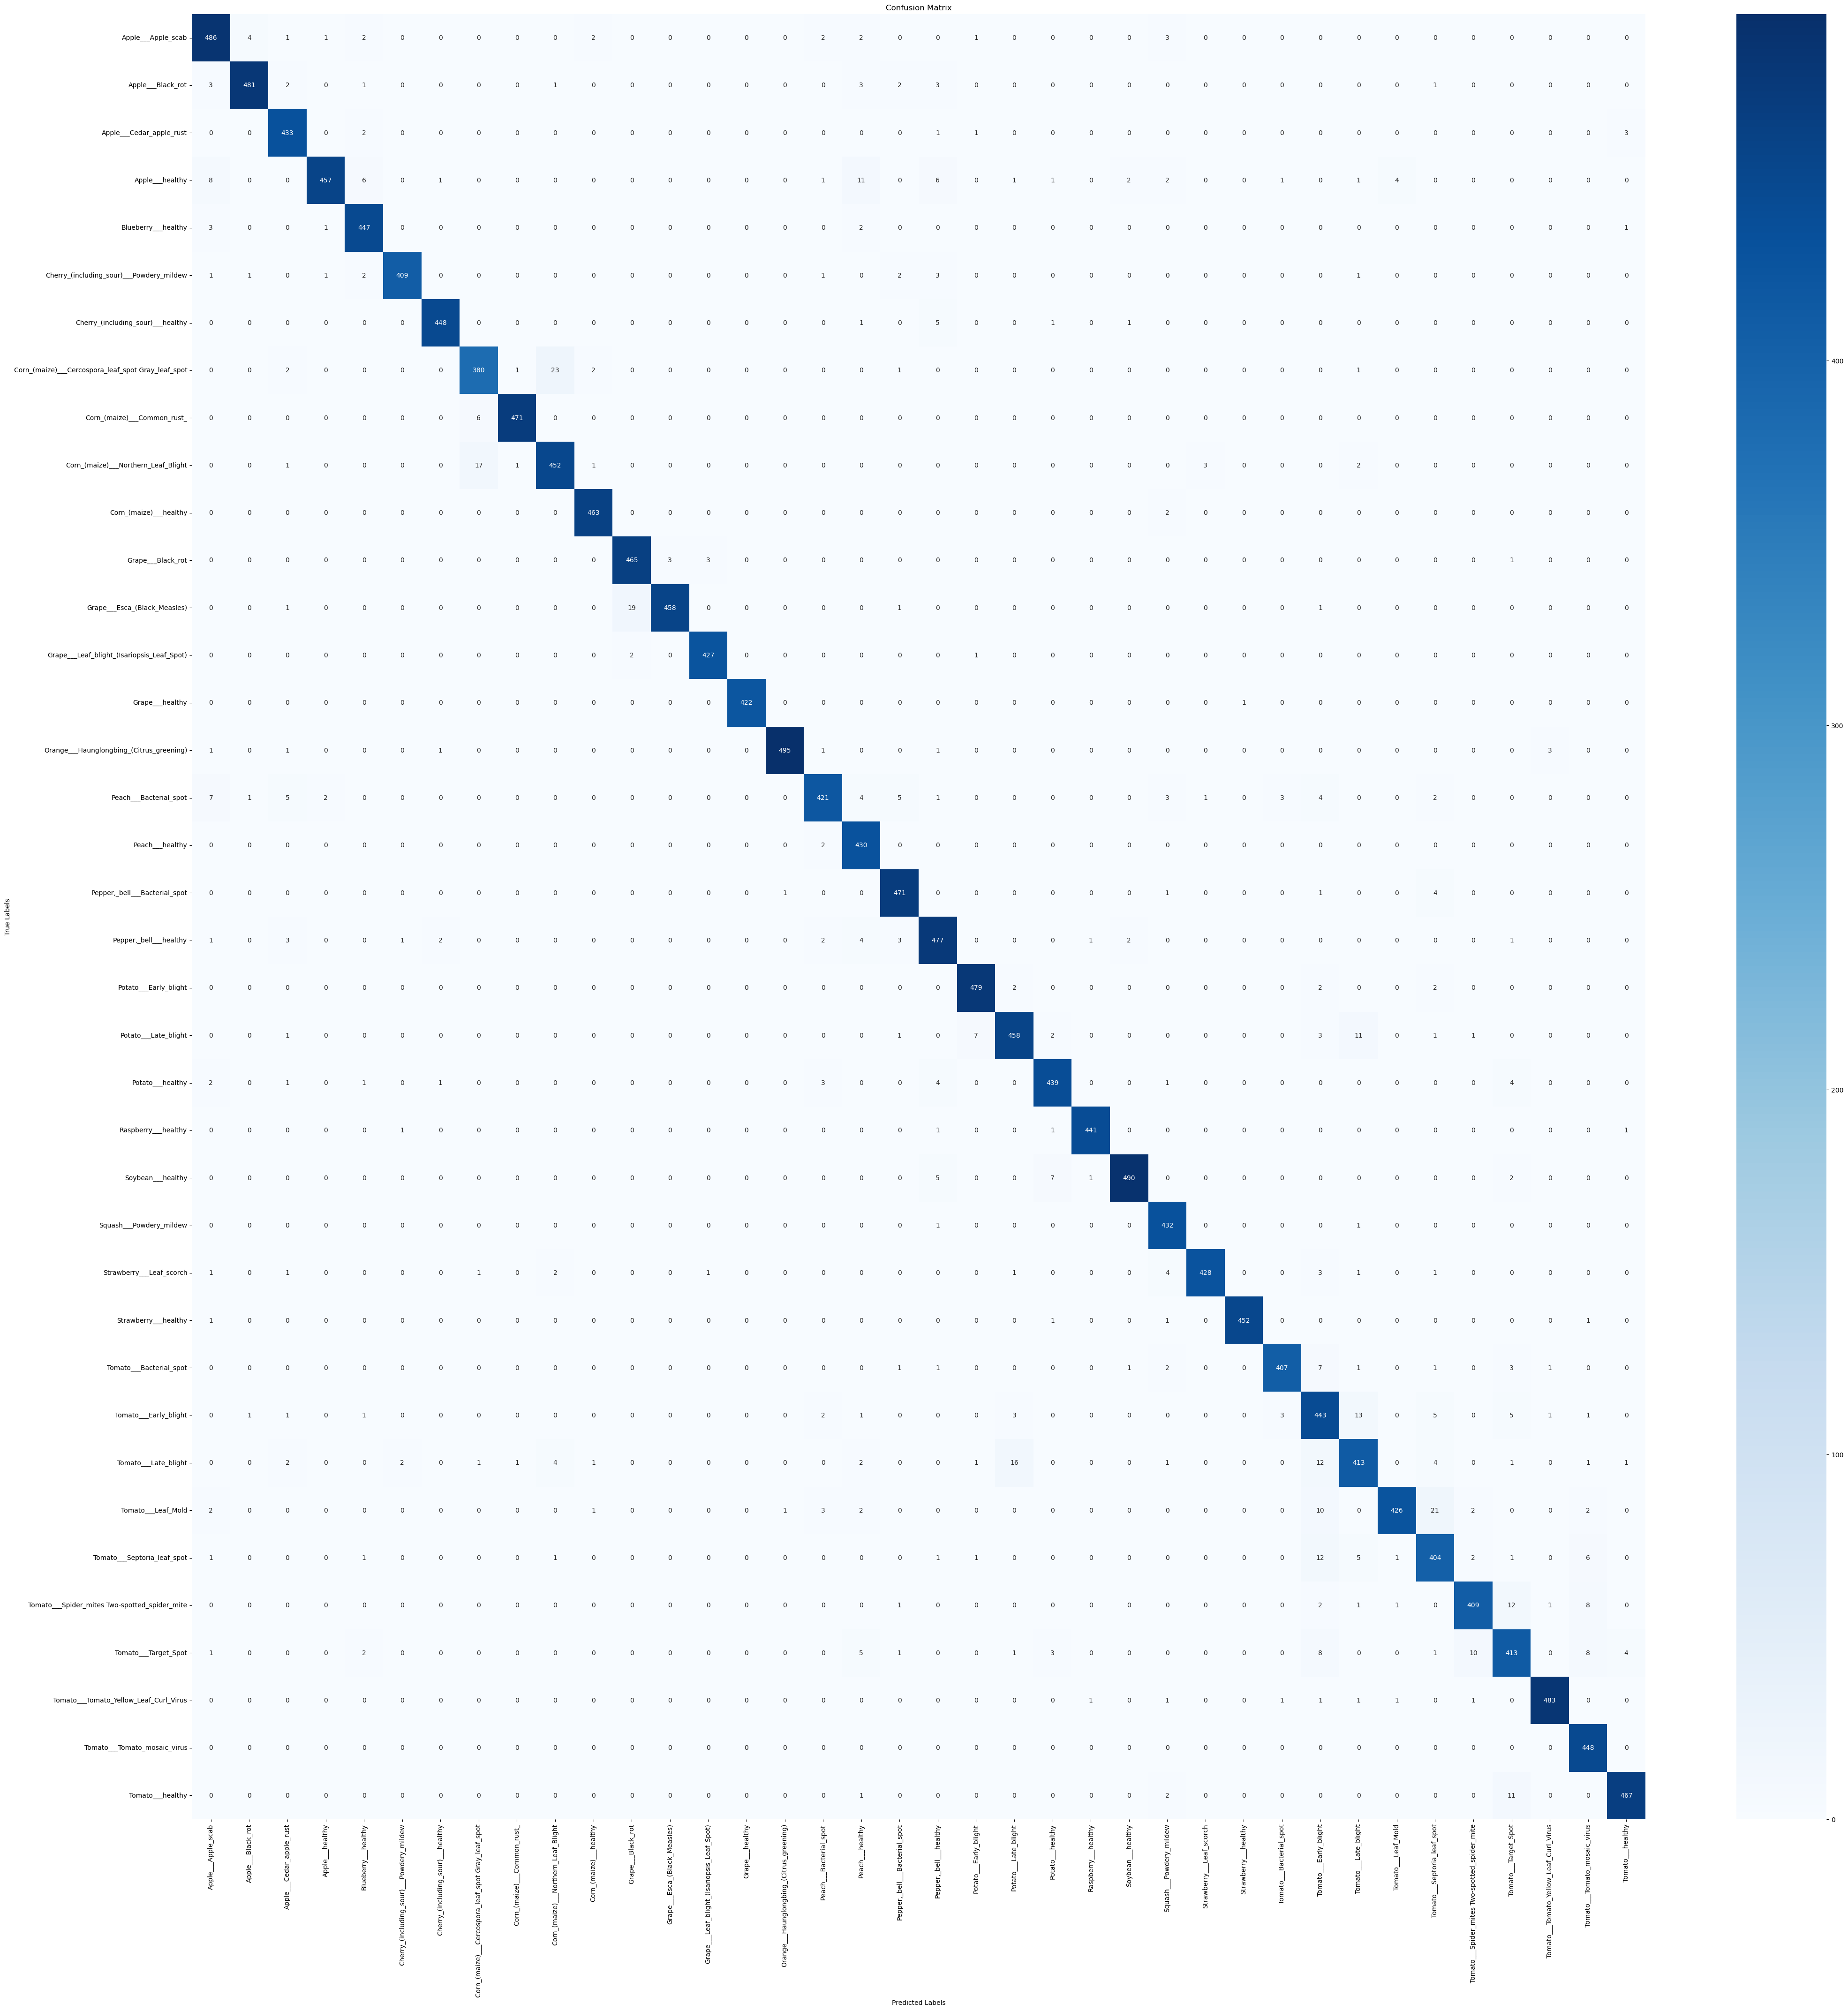

In [23]:
conf_matrix = confusion_matrix(true_predictions, predicted_classes)

plt.figure(figsize=(50, 50))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.savefig(os.path.join(output_dir, 'confusion_matrix.jpeg'), format='jpeg')
plt.close()